# Descriptive Statistics:

Descriptive statistics is a branch of statistics that summarizes and describes the main features of a dataset in a simple and meaningful way.
It helps you understand what the data looks like, without making predictions or conclusions beyond the data.
Some of the following questions it will answer mathematically are:
1. what might be the average value?
2. What might be the mid value?
3. What values occurs most frequently?
4. How is the data distributed?
5. are there outliers or not present in the dataset?
6. are the data symetrical, skewed or not?
7. is the data numerical or categorical?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

In [2]:
df=sns.load_dataset("tips")
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [4]:
# check the categorical and numerical values.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [9]:
cat_col=df.select_dtypes(include=['object','category']).columns
print(cat_col)

Index(['sex', 'smoker', 'day', 'time'], dtype='object')


In [10]:
num_col=df.select_dtypes(include='number').columns
print(num_col)

Index(['total_bill', 'tip', 'size'], dtype='object')


In [13]:
len(num_col)

3

In [14]:
# check the shape and size of the data:
df.shape   # 244 rows and 7 columns present

(244, 7)

In [15]:
df.size

1708

In [16]:
# check the max and min values in each columns in numerical columns.
df['total_bill'].max(),df['total_bill'].min()

(50.81, 3.07)

In [17]:
df['tip'].max(),df['tip'].min()

(10.0, 1.0)

In [18]:
df['size'].max(),df['size'].min()

(6, 1)

In [23]:
for i in num_col:
    print(f"{i} max={df[i].min()},min={df[i].max()}")

total_bill max=3.07,min=50.81
tip max=1.0,min=10.0
size max=1,min=6


### check the central tendency in each column:

In [26]:
df['total_bill'].mean()

19.78594262295082

In [27]:
df['total_bill'].median()

17.795

In [28]:
df['total_bill'].mode()

0    13.42
Name: total_bill, dtype: float64

If the data is symmetrical we have to use mean, if the data is skewed then use median and for categories use mode.
But mostly we use median as both the mode is not frequently used and mean is sensitive to outliers.

In [29]:
for i in num_col:
    print(f"{i}: mean={df[i].mean()}, median={df[i].median()}, mode={df[i].mode()}")

total_bill: mean=19.78594262295082, median=17.795, mode=0    13.42
Name: total_bill, dtype: float64
tip: mean=2.99827868852459, median=2.9, mode=0    2.0
Name: tip, dtype: float64
size: mean=2.569672131147541, median=2.0, mode=0    2
Name: size, dtype: int64


In [40]:
# List to store each column's stats
stats_list = []

for col in num_col:
    stats = {
        'Column': col,
        'Mean': df[col].mean(),
        'Median': df[col].median(),
        'Mode': df[col].mode().iloc[0]  # pick the first mode if multiple
    }
    stats_list.append(stats)

# Convert list of dicts to DataFrame
stats_df = pd.DataFrame(stats_list)
stats_df

,Column,Mean,Median,Mode
0,total_bill,19.785943,17.795,13.42
1,tip,2.998279,2.900,2.00
2,size,2.569672,2.000,2.00


###  check the spread of my data:

In [31]:
df['total_bill'].max()-df['total_bill'].min()  # range.

47.74

In [32]:
# check how far the values are from mean? using variance.
df['total_bill'].var()

79.25293861397827

In [33]:
# check the average distance from the mean using standard deviation.
df['total_bill'].std()

8.902411954856856

In [34]:
# if sd is small, data are tightly bound
# if sd is large, data are spread out.

In [36]:
for i in num_col:
    print(f"{i}: Range={df[i].max()-df[i].min()}, Variance={df[i].var()}, standard deviation={df[i].std()}")

total_bill: Range=47.74, Variance=79.25293861397827, standard deviation=8.902411954856856
tip: Range=9.0, Variance=1.914454638062471, standard deviation=1.3836381890011822
size: Range=5, Variance=0.9045908385616945, standard deviation=0.9510998047322344


In [41]:
spread_list = []

for col in num_col:
    statss = {
        'Column': col,
        'Range': df[col].max()-df[col].min(),
        'Variance': df[col].var(),
        'Standard deviation': df[col].std()  # pick the first mode if multiple
    }
    spread_list.append(statss)

# Convert list of dicts to DataFrame
spread_df = pd.DataFrame(spread_list)
spread_df

,Column,Range,Variance,Standard deviation
0,total_bill,47.74,79.252939,8.902412
1,tip,9.00,1.914455,1.383638
2,size,5.00,0.904591,0.951100


### Quantile: how data are distributed in parts:

In [43]:
df['total_bill'].quantile([0.25,0.5,0.75])

0.25    13.3475
0.50    17.7950
0.75    24.1275
Name: total_bill, dtype: float64

In [45]:
q1=np.percentile(df['total_bill'],25)
q1

13.3475

In [46]:
# Q1: 25% of the data is below this value
# Q2: 50% (median) of the data is below this value.
# Q3: 75% of the data is below this value

In [47]:
# find the interquartile range: IQR=Q3-Q1
iqr=df['total_bill'].quantile(0.75)-df['total_bill'].quantile(0.25)
iqr

10.779999999999998

In [48]:
# find the lower and upper bound:
lower_bound=df['total_bill'].quantile(0.25)-1.5*iqr
upper_bound=df['total_bill'].quantile(0.75)+1.5*iqr
print(lower_bound,upper_bound)

-2.8224999999999945 40.29749999999999


In [49]:
for col in num_col:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    print(f"Column: {col}")
    print(f"IQR: {IQR}, Lower: {lower_bound}, Upper: {upper_bound}\n")

Column: total_bill
IQR: 10.779999999999998, Lower: -2.8224999999999945, Upper: 40.29749999999999

Column: tip
IQR: 1.5625, Lower: -0.34375, Upper: 5.90625

Column: size
IQR: 1.0, Lower: 0.5, Upper: 4.5



In [51]:
for col in num_col:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Keep only values within bounds
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

# check the skewness:

In [52]:
df['total_bill'].skew()

0.8398257745878875

In [53]:
# if skew is positive, right skewed.
# if skew is negative, left skewed.

In [54]:
df['total_bill'].kurtosis()

0.4493063662817849

In [55]:
# if kurtosis is nearly equal to zero, then it is called mesokurtic (normal)
# if kurtosis is less than zero, it is called platykurtic (light tails, flatter peak. left skewed
# if kurtosis is more than zero, it is called leptokurtic (heavy tails, sharper peak, more outliers.)

<Axes: >

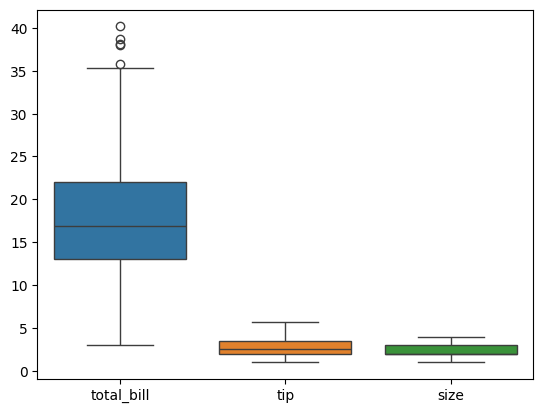

In [56]:
# check with visualization:
sns.boxplot(data=df)

In [59]:
# group wise statistics:
df.groupby('smoker',observed=True)['tip'].describe()

,count,mean,std,min,25%,50%,75%,max
smoker,,,,,,,,
Yes,84.0,2.831071,1.093839,1.0,2.0,3.000,3.5125,5.65
No,138.0,2.714855,1.014636,1.0,2.0,2.545,3.3400,5.60


In [60]:
# check the relationship:
df['total_bill'].corr(df['tip'])

0.6037054127345067


=== ANALYSIS OF TOTAL_BILL ===
Mean: 19.79, Median: 17.80, Mode: 13.42
Std: 8.90, Variance: 79.25, IQR: 10.78, Range: 47.74
Skewness: 1.13, Kurtosis: 1.22

-- STORY & INSIGHTS --
- total_bill is right-skewed. Few high values pull the mean above the median.
- total_bill has light tails → fewer extremes than normal.
- Most typical total_bill ≈ 17.80 (median).
- Middle 50% of total_bill is between 13.35 and 24.13 (IQR).
- Consider using median/IQR for robust scaling if outliers exist.

-- ACTION / CONSIDERATIONS --
- Use median for reporting typical total_bill.
- Consider log or sqrt transform of total_bill for ML models.


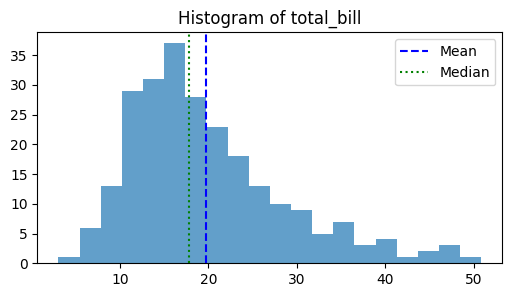

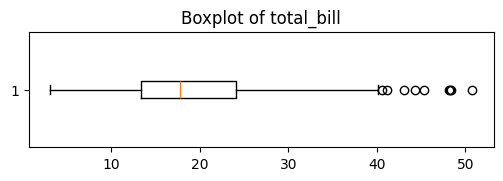


=== ANALYSIS OF TIP ===
Mean: 3.00, Median: 2.90, Mode: 2.00
Std: 1.38, Variance: 1.91, IQR: 1.56, Range: 9.00
Skewness: 1.47, Kurtosis: 3.65

-- STORY & INSIGHTS --
- tip is right-skewed. Few high values pull the mean above the median.
- tip has heavy tails → potential outliers exist.
- Most typical tip ≈ 2.90 (median).
- Middle 50% of tip is between 2.00 and 3.56 (IQR).
- Consider using median/IQR for robust scaling if outliers exist.

-- ACTION / CONSIDERATIONS --
- Use median for reporting typical tip.
- Consider log or sqrt transform of tip for ML models.


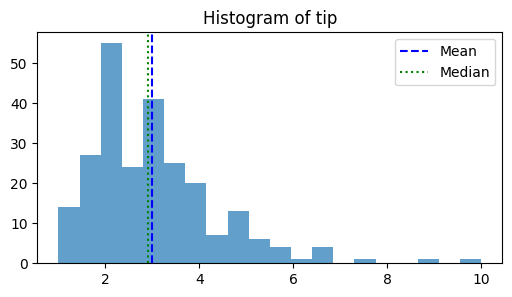

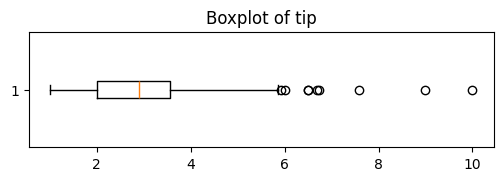


=== ANALYSIS OF SIZE ===
Mean: 2.57, Median: 2.00, Mode: 2.00
Std: 0.95, Variance: 0.90, IQR: 1.00, Range: 5.00
Skewness: 1.45, Kurtosis: 1.73

-- STORY & INSIGHTS --
- size is right-skewed. Few high values pull the mean above the median.
- size has light tails → fewer extremes than normal.
- Most typical size ≈ 2.00 (median).
- Middle 50% of size is between 2.00 and 3.00 (IQR).
- Consider using median/IQR for robust scaling if outliers exist.

-- ACTION / CONSIDERATIONS --
- Use median for reporting typical size.
- Consider log or sqrt transform of size for ML models.


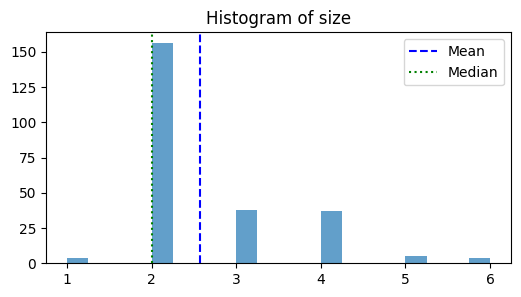

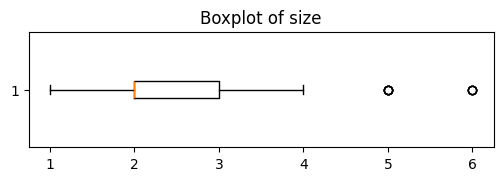

In [62]:
# Load tips dataset
tips = sns.load_dataset("tips")

# Function to analyze any numeric column
def describe_numeric(df, col):
    print(f"\n=== ANALYSIS OF {col.upper()} ===")
    
    data = df[col]
    
    # 1️⃣ Central Tendency
    mean = data.mean()
    median = data.median()
    mode = data.mode()[0]
    
    print(f"Mean: {mean:.2f}, Median: {median:.2f}, Mode: {mode:.2f}")
    
    # 2️⃣ Spread
    std = data.std()
    var = data.var()
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    data_range = data.max() - data.min()
    
    print(f"Std: {std:.2f}, Variance: {var:.2f}, IQR: {IQR:.2f}, Range: {data_range:.2f}")
    
    # 3️⃣ Shape
    skew = data.skew()
    kurt = data.kurt()
    print(f"Skewness: {skew:.2f}, Kurtosis: {kurt:.2f}")
    
    # 4️⃣ Insights / Storytelling
    print("\n-- STORY & INSIGHTS --")
    if skew > 0.5:
        print(f"- {col} is right-skewed. Few high values pull the mean above the median.")
    elif skew < -0.5:
        print(f"- {col} is left-skewed. Few low values pull the mean below the median.")
    else:
        print(f"- {col} is roughly symmetric. Mean ≈ Median.")
    
    if kurt > 3:
        print(f"- {col} has heavy tails → potential outliers exist.")
    elif kurt < 3:
        print(f"- {col} has light tails → fewer extremes than normal.")
    
    print(f"- Most typical {col} ≈ {median:.2f} (median).")
    print(f"- Middle 50% of {col} is between {Q1:.2f} and {Q3:.2f} (IQR).")
    print(f"- Consider using median/IQR for robust scaling if outliers exist.")
    
    # 5️⃣ Action / Recommendation
    print("\n-- ACTION / CONSIDERATIONS --")
    print(f"- Use median for reporting typical {col}.")
    if abs(skew) > 0.5:
        print(f"- Consider log or sqrt transform of {col} for ML models.")
    if IQR < std:
        print(f"- Check for outliers in {col} using boxplot.")
    
    # 6️⃣ Optional visualization
    plt.figure(figsize=(6,3))
    plt.hist(data, bins=20, alpha=0.7)
    plt.axvline(mean, color='blue', linestyle='--', label='Mean')
    plt.axvline(median, color='green', linestyle=':', label='Median')
    plt.title(f"Histogram of {col}")
    plt.legend()
    plt.show()
    
    plt.figure(figsize=(6,1.5))
    plt.boxplot(data, vert=False)
    plt.title(f"Boxplot of {col}")
    plt.show()

# Apply function to all numeric columns in tips
numeric_cols = tips.select_dtypes(include=np.number).columns
for col in numeric_cols:
    describe_numeric(tips, col)

In [64]:
# Load tips dataset
tips = sns.load_dataset("tips")

# Function to describe categorical columns
def describe_categorical(df, col):
    print(f"\n=== ANALYSIS OF {col.upper()} ===")
    
    data = df[col]
    
    # 1️⃣ Counts and frequency
    counts = data.value_counts()
    mode = data.mode()[0]
    
    print("Counts:")
    print(counts)
    print(f"Most common category (Mode): {mode}")
    
    # 2️⃣ Insights / Storytelling
    print("\n-- STORY & INSIGHTS --")
    top_pct = counts[0] / counts.sum() * 100
    if top_pct > 50:
        print(f"- {mode} dominates ({top_pct:.1f}% of total), most customers belong to this category.")
    else:
        print(f"- {col} is distributed across categories, no single category dominates.")
    
    if len(counts) > 5:
        print(f"- Many categories exist → consider grouping or reducing dimensionality for ML.")
    
    # 3️⃣ Action / Considerations
    print("\n-- ACTION / CONSIDERATIONS --")
    print(f"- Consider one-hot encoding or label encoding for ML.")
    if top_pct > 80:
        print(f"- This categorical feature may not add much value for ML as one category dominates.")
    
    # 4️⃣ Optional visualization
    plt.figure(figsize=(6,3))
    counts.plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title(f"Bar Plot of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

# Apply function to all categorical columns in tips
categorical_cols = tips.select_dtypes(include='object').columns
for col in categorical_cols:
    describe_categorical(tips, col)


=== NUMERIC ANALYSIS: TOTAL_BILL ===
Mean: 19.79, Median: 17.80, Mode: 13.42
Std: 8.90, Variance: 79.25, IQR: 10.78, Range: 47.74
Skewness: 1.13, Kurtosis: 1.22

-- STORY / INSIGHT --
- total_bill is right-skewed → few high values pull the mean above the median.
- total_bill has light tails → fewer extremes than normal.
- Most typical total_bill ≈ 17.80 (median).
- Middle 50% of total_bill is between 13.35 and 24.13 (IQR).

-- ACTION / CONSIDERATION --
- Use median/IQR for reporting or robust scaling if outliers exist.
- Consider log/sqrt transformation for ML if skewed.


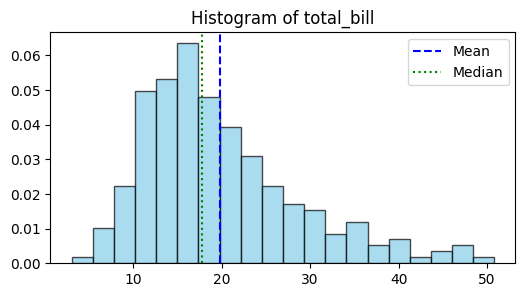

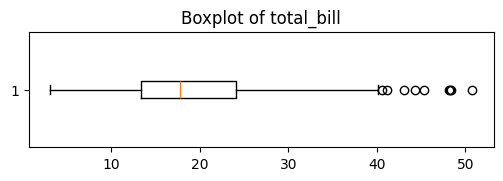


=== NUMERIC ANALYSIS: TIP ===
Mean: 3.00, Median: 2.90, Mode: 2.00
Std: 1.38, Variance: 1.91, IQR: 1.56, Range: 9.00
Skewness: 1.47, Kurtosis: 3.65

-- STORY / INSIGHT --
- tip is right-skewed → few high values pull the mean above the median.
- tip has heavy tails → potential outliers exist.
- Most typical tip ≈ 2.90 (median).
- Middle 50% of tip is between 2.00 and 3.56 (IQR).

-- ACTION / CONSIDERATION --
- Use median/IQR for reporting or robust scaling if outliers exist.
- Consider log/sqrt transformation for ML if skewed.


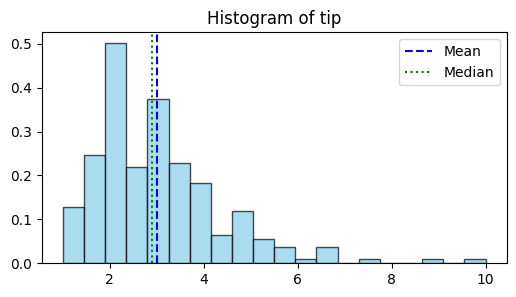

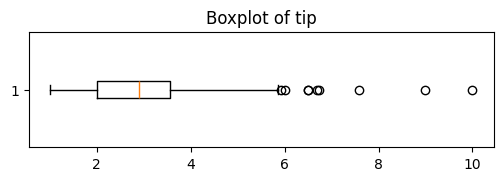


=== NUMERIC ANALYSIS: SIZE ===
Mean: 2.57, Median: 2.00, Mode: 2.00
Std: 0.95, Variance: 0.90, IQR: 1.00, Range: 5.00
Skewness: 1.45, Kurtosis: 1.73

-- STORY / INSIGHT --
- size is right-skewed → few high values pull the mean above the median.
- size has light tails → fewer extremes than normal.
- Most typical size ≈ 2.00 (median).
- Middle 50% of size is between 2.00 and 3.00 (IQR).

-- ACTION / CONSIDERATION --
- Use median/IQR for reporting or robust scaling if outliers exist.
- Consider log/sqrt transformation for ML if skewed.


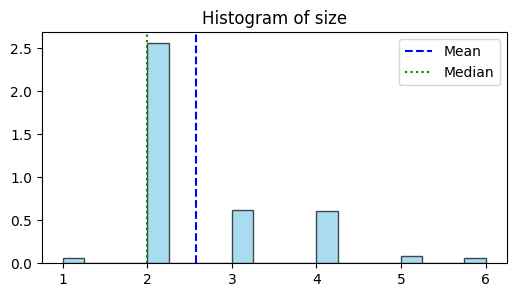

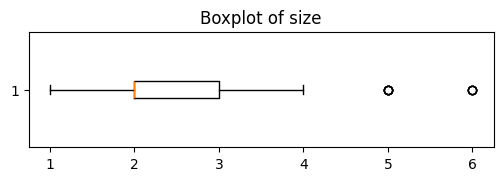


=== CATEGORICAL ANALYSIS: SEX ===
Counts:
sex
Male      157
Female     87
Name: count, dtype: int64
Most common category (Mode): Male

-- STORY / INSIGHT --
- Male dominates (64.3% of total), most customers belong here.

-- ACTION / CONSIDERATION --
- Consider one-hot encoding or label encoding for ML.


C:\Users\HP\AppData\Local\Temp\ipykernel_14324\1587867816.py:75: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  top_pct = counts[0] / counts.sum() * 100


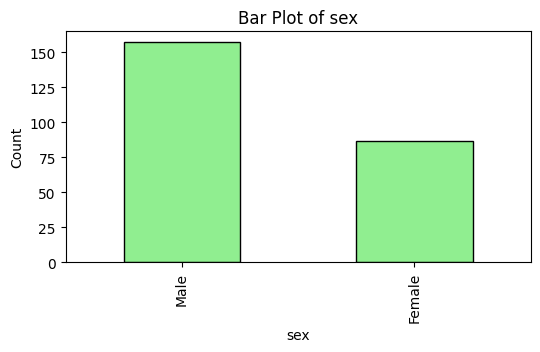


=== CATEGORICAL ANALYSIS: SMOKER ===
Counts:
smoker
No     151
Yes     93
Name: count, dtype: int64
Most common category (Mode): No

-- STORY / INSIGHT --
- No dominates (61.9% of total), most customers belong here.

-- ACTION / CONSIDERATION --
- Consider one-hot encoding or label encoding for ML.


C:\Users\HP\AppData\Local\Temp\ipykernel_14324\1587867816.py:75: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  top_pct = counts[0] / counts.sum() * 100


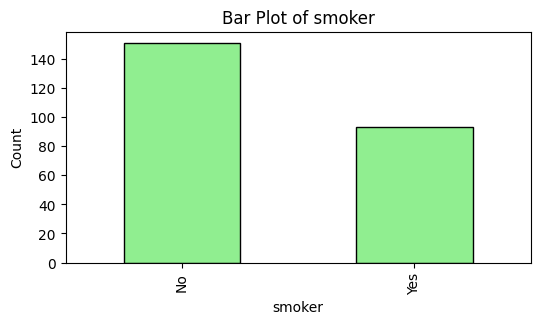


=== CATEGORICAL ANALYSIS: DAY ===
Counts:
day
Sat     87
Sun     76
Thur    62
Fri     19
Name: count, dtype: int64
Most common category (Mode): Sat

-- STORY / INSIGHT --
- day is distributed across categories, no single category dominates.

-- ACTION / CONSIDERATION --
- Consider one-hot encoding or label encoding for ML.


C:\Users\HP\AppData\Local\Temp\ipykernel_14324\1587867816.py:75: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  top_pct = counts[0] / counts.sum() * 100


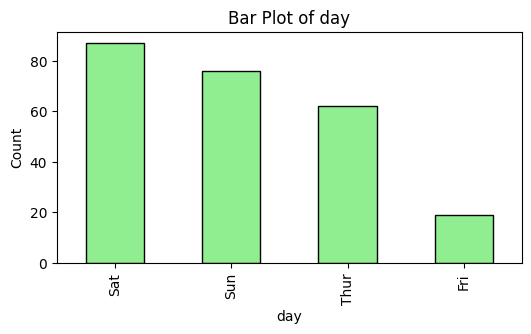


=== CATEGORICAL ANALYSIS: TIME ===
Counts:
time
Dinner    176
Lunch      68
Name: count, dtype: int64
Most common category (Mode): Dinner

-- STORY / INSIGHT --
- Dinner dominates (72.1% of total), most customers belong here.

-- ACTION / CONSIDERATION --
- Consider one-hot encoding or label encoding for ML.


C:\Users\HP\AppData\Local\Temp\ipykernel_14324\1587867816.py:75: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  top_pct = counts[0] / counts.sum() * 100


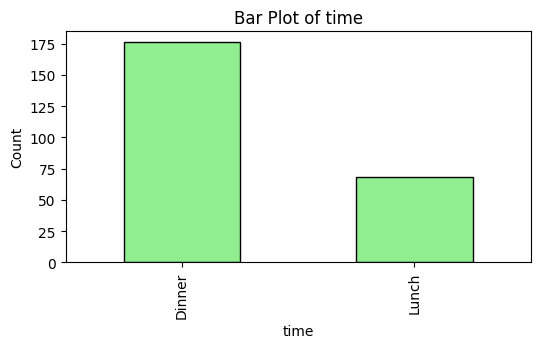

In [69]:
# Load dataset
tips = sns.load_dataset("tips")

# Function for numeric columns
def describe_numeric(df, col):
    print(f"\n=== NUMERIC ANALYSIS: {col.upper()} ===")
    data = df[col]

    mean = data.mean()
    median = data.median()
    mode = data.mode()[0]
    std = data.std()
    var = data.var()
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    data_range = data.max() - data.min()
    skew = data.skew()
    kurt = data.kurt()

    print(f"Mean: {mean:.2f}, Median: {median:.2f}, Mode: {mode:.2f}")
    print(f"Std: {std:.2f}, Variance: {var:.2f}, IQR: {IQR:.2f}, Range: {data_range:.2f}")
    print(f"Skewness: {skew:.2f}, Kurtosis: {kurt:.2f}")

    # Story
    print("\n-- STORY / INSIGHT --")
    if skew > 0.5:
        print(f"- {col} is right-skewed → few high values pull the mean above the median.")
    elif skew < -0.5:
        print(f"- {col} is left-skewed → few low values pull the mean below the median.")
    else:
        print(f"- {col} is roughly symmetric → mean ≈ median.")
    
    if kurt > 3:
        print(f"- {col} has heavy tails → potential outliers exist.")
    elif kurt < 3:
        print(f"- {col} has light tails → fewer extremes than normal.")
    
    print(f"- Most typical {col} ≈ {median:.2f} (median).")
    print(f"- Middle 50% of {col} is between {Q1:.2f} and {Q3:.2f} (IQR).")

    # Action / ML
    print("\n-- ACTION / CONSIDERATION --")
    print(f"- Use median/IQR for reporting or robust scaling if outliers exist.")
    if abs(skew) > 0.5:
        print(f"- Consider log/sqrt transformation for ML if skewed.")

    # Visuals
    plt.figure(figsize=(6,3))
    plt.hist(data, bins=20, alpha=0.7, color='skyblue', edgecolor='black', density=True)
    plt.axvline(mean, color='blue', linestyle='--', label='Mean')
    plt.axvline(median, color='green', linestyle=':', label='Median')
    plt.title(f"Histogram of {col}")
    plt.legend()
    plt.show()

    plt.figure(figsize=(6,1.5))
    plt.boxplot(data, vert=False)
    plt.title(f"Boxplot of {col}")
    plt.show()

# Function for categorical columns
def describe_categorical(df, col):
    print(f"\n=== CATEGORICAL ANALYSIS: {col.upper()} ===")
    data = df[col]
    counts = data.value_counts()
    mode = data.mode()[0]

    print("Counts:")
    print(counts)
    print(f"Most common category (Mode): {mode}")

    # Story
    print("\n-- STORY / INSIGHT --")
    top_pct = counts[0] / counts.sum() * 100
    if top_pct > 50:
        print(f"- {mode} dominates ({top_pct:.1f}% of total), most customers belong here.")
    else:
        print(f"- {col} is distributed across categories, no single category dominates.")

    if len(counts) > 5:
        print(f"- Many categories exist → consider grouping or dimensionality reduction for ML.")

    # Action / ML
    print("\n-- ACTION / CONSIDERATION --")
    print("- Consider one-hot encoding or label encoding for ML.")
    if top_pct > 80:
        print("- Feature may not add much value for ML as one category dominates.")

    # Visuals
    plt.figure(figsize=(6,3))
    counts.plot(kind='bar', color='lightgreen', edgecolor='black')
    plt.title(f"Bar Plot of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

# Run numeric analysis
numeric_cols = tips.select_dtypes(include=np.number).columns
for col in numeric_cols:
    describe_numeric(tips, col)

# Run categorical analysis
categorical_cols = tips.select_dtypes(include=['object','category']).columns
for col in categorical_cols:
    describe_categorical(tips, col)

In [68]:
# use describe method:
df.describe()

,total_bill,tip,size
count,222.000000,222.000000,222.000000
mean,18.200405,2.758829,2.409910
std,7.129257,1.044384,0.748145
min,3.070000,1.000000,1.000000
25%,13.007500,2.000000,2.000000
50%,16.950000,2.605000,2.000000
75%,22.015000,3.480000,3.000000
max,40.170000,5.650000,4.000000



=== NUMERIC: TOTAL_BILL ===
Mean: 19.79, Median: 17.80, Mode: 13.42
Std: 8.90, Variance: 79.25, IQR: 10.78, Range: 47.74
Skewness: 1.13 (right-skewed → few high values pull the mean above the median.), Kurtosis: 1.22 (light tails → fewer extremes than normal.)

Story / Insight:
- Most typical total_bill ≈ 17.80 (median).
- Middle 50% of total_bill is between 13.35 and 24.13 (IQR).

Action / Consideration:
- Use median/IQR for reporting or robust scaling if outliers exist.
- Consider log/sqrt transformation for ML if skewed.



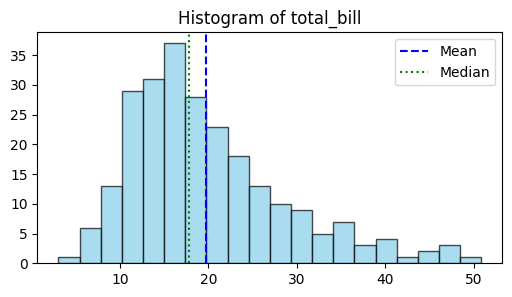

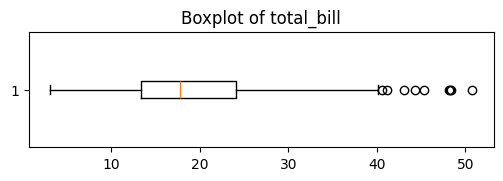


=== NUMERIC: TIP ===
Mean: 3.00, Median: 2.90, Mode: 2.00
Std: 1.38, Variance: 1.91, IQR: 1.56, Range: 9.00
Skewness: 1.47 (right-skewed → few high values pull the mean above the median.), Kurtosis: 3.65 (heavy tails → potential outliers exist.)

Story / Insight:
- Most typical tip ≈ 2.90 (median).
- Middle 50% of tip is between 2.00 and 3.56 (IQR).

Action / Consideration:
- Use median/IQR for reporting or robust scaling if outliers exist.
- Consider log/sqrt transformation for ML if skewed.



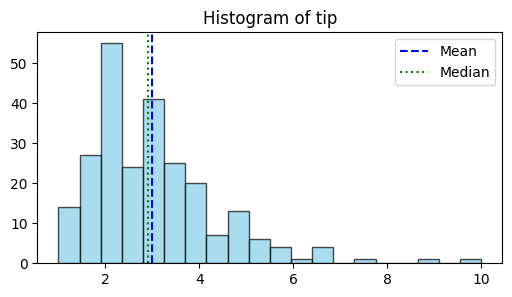

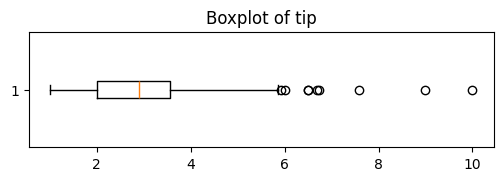


=== NUMERIC: SIZE ===
Mean: 2.57, Median: 2.00, Mode: 2.00
Std: 0.95, Variance: 0.90, IQR: 1.00, Range: 5.00
Skewness: 1.45 (right-skewed → few high values pull the mean above the median.), Kurtosis: 1.73 (light tails → fewer extremes than normal.)

Story / Insight:
- Most typical size ≈ 2.00 (median).
- Middle 50% of size is between 2.00 and 3.00 (IQR).

Action / Consideration:
- Use median/IQR for reporting or robust scaling if outliers exist.
- Consider log/sqrt transformation for ML if skewed.



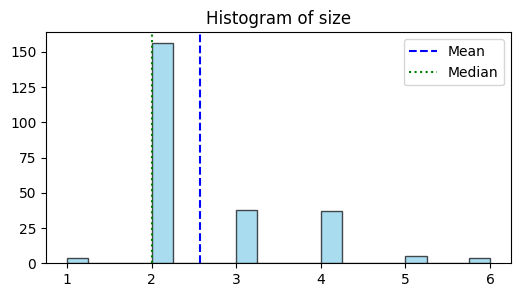

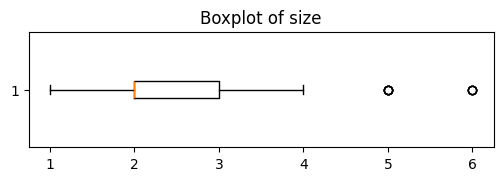


=== CATEGORICAL: SEX ===
Counts:
sex
Male      157
Female     87
Name: count, dtype: int64

Most common category (Mode): Male

Story / Insight:
- 'Male' dominates (64.3% of total), most customers belong here.

-- ACTION / CONSIDERATION --
- Consider one-hot encoding or label encoding for ML.


C:\Users\HP\AppData\Local\Temp\ipykernel_14324\2638160980.py:71: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  top_pct = counts[0] / counts.sum() * 100


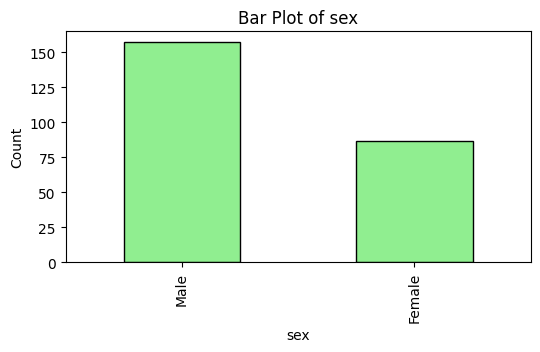

C:\Users\HP\AppData\Local\Temp\ipykernel_14324\2638160980.py:71: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  top_pct = counts[0] / counts.sum() * 100



=== CATEGORICAL: SMOKER ===
Counts:
smoker
No     151
Yes     93
Name: count, dtype: int64

Most common category (Mode): No

Story / Insight:
- 'No' dominates (61.9% of total), most customers belong here.

-- ACTION / CONSIDERATION --
- Consider one-hot encoding or label encoding for ML.


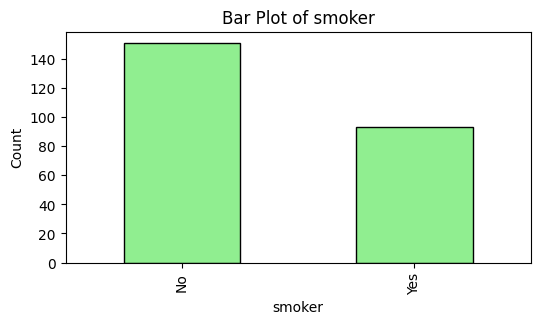


=== CATEGORICAL: DAY ===
Counts:
day
Sat     87
Sun     76
Thur    62
Fri     19
Name: count, dtype: int64

Most common category (Mode): Sat

Story / Insight:
- day is distributed across categories, no single category dominates.

-- ACTION / CONSIDERATION --
- Consider one-hot encoding or label encoding for ML.


C:\Users\HP\AppData\Local\Temp\ipykernel_14324\2638160980.py:71: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  top_pct = counts[0] / counts.sum() * 100


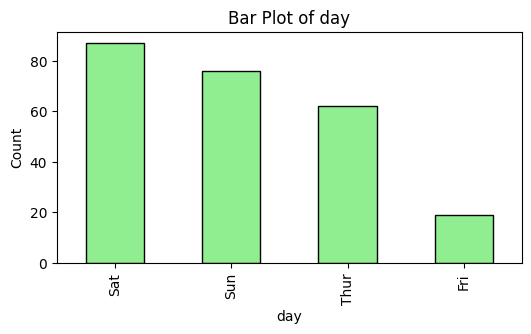

C:\Users\HP\AppData\Local\Temp\ipykernel_14324\2638160980.py:71: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  top_pct = counts[0] / counts.sum() * 100



=== CATEGORICAL: TIME ===
Counts:
time
Dinner    176
Lunch      68
Name: count, dtype: int64

Most common category (Mode): Dinner

Story / Insight:
- 'Dinner' dominates (72.1% of total), most customers belong here.

-- ACTION / CONSIDERATION --
- Consider one-hot encoding or label encoding for ML.


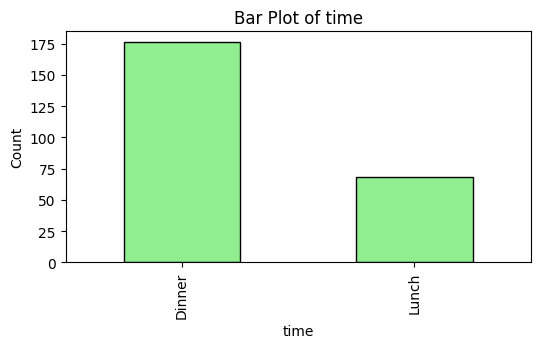

In [71]:
# Load dataset
tips = sns.load_dataset("tips")


# Function for numeric columns
def numeric_summary(df, col):
    data = df[col]
    mean = data.mean()
    median = data.median()
    mode = data.mode()[0]
    std = data.std()
    var = data.var()
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    data_range = data.max() - data.min()
    skew = data.skew()
    kurt = data.kurt()

    # Prepare story/insight
    if skew > 0.5:
        skew_text = "right-skewed → few high values pull the mean above the median."
    elif skew < -0.5:
        skew_text = "left-skewed → few low values pull the mean below the median."
    else:
        skew_text = "roughly symmetric → mean ≈ median."

    if kurt > 3:
        kurt_text = "heavy tails → potential outliers exist."
    elif kurt < 3:
        kurt_text = "light tails → fewer extremes than normal."
    else:
        kurt_text = "normal tails."

    report = f"""
=== NUMERIC: {col.upper()} ===
Mean: {mean:.2f}, Median: {median:.2f}, Mode: {mode:.2f}
Std: {std:.2f}, Variance: {var:.2f}, IQR: {IQR:.2f}, Range: {data_range:.2f}
Skewness: {skew:.2f} ({skew_text}), Kurtosis: {kurt:.2f} ({kurt_text})

Story / Insight:
- Most typical {col} ≈ {median:.2f} (median).
- Middle 50% of {col} is between {Q1:.2f} and {Q3:.2f} (IQR).

Action / Consideration:
- Use median/IQR for reporting or robust scaling if outliers exist.
- Consider log/sqrt transformation for ML if skewed.
"""
    print(report)

    # Plots
    plt.figure(figsize=(6,3))
    plt.hist(data, bins=20, alpha=0.7, color='skyblue', edgecolor='black')
    plt.axvline(mean, color='blue', linestyle='--', label='Mean')
    plt.axvline(median, color='green', linestyle=':', label='Median')
    plt.title(f"Histogram of {col}")
    plt.legend()
    plt.show()

    plt.figure(figsize=(6,1.5))
    plt.boxplot(data, vert=False)
    plt.title(f"Boxplot of {col}")
    plt.show()

# Function for categorical columns
def categorical_summary(df, col):
    data = df[col]
    counts = data.value_counts()
    mode = data.mode()[0]

    top_pct = counts[0] / counts.sum() * 100
    if top_pct > 50:
        insight = f"'{mode}' dominates ({top_pct:.1f}% of total), most customers belong here."
    else:
        insight = f"{col} is distributed across categories, no single category dominates."

    report = f"""
=== CATEGORICAL: {col.upper()} ===
Counts:
{counts}

Most common category (Mode): {mode}

Story / Insight:
- {insight}
"""
    print(report)

    # Action / ML
    print("-- ACTION / CONSIDERATION --")
    print("- Consider one-hot encoding or label encoding for ML.")
    if top_pct > 80:
        print("- Feature may not add much value for ML as one category dominates.")

    # Plot
    plt.figure(figsize=(6,3))
    counts.plot(kind='bar', color='lightgreen', edgecolor='black')
    plt.title(f"Bar Plot of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

# Run numeric summary for all numeric columns
numeric_cols = tips.select_dtypes(include=np.number).columns
for col in numeric_cols:
    numeric_summary(tips, col)

# Run categorical summary for all categorical columns
categorical_cols = tips.select_dtypes(include=['object','category']).columns
for col in categorical_cols:
    categorical_summary(tips, col)

In [73]:
# lets do with different dataset:
dt=px.data.gapminder()
dt

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,AFG,4
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,AFG,4
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,AFG,4
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,AFG,4
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,AFG,4
...,...,...,...,...,...,...,...,...
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306,ZWE,716
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786,ZWE,716
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960,ZWE,716
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623,ZWE,716


In [74]:
dt.groupby('continent')['lifeExp'].mean()

continent
Africa      48.865330
Americas    64.658737
Asia        60.064903
Europe      71.903686
Oceania     74.326208
Name: lifeExp, dtype: float64

In [80]:
dt[dt['continent']=='Asia']['lifeExp'].mean()

60.064903232323225